In [1]:
import pandas as pd

df_links = pd.read_csv('../Data/ml-latest-small/links.csv')
df_movies = pd.read_csv('../Data/ml-latest-small/movies.csv')
df_ratings = pd.read_csv('../Data/ml-latest-small/ratings.csv')
df_tags = pd.read_csv('../Data/ml-latest-small/tags.csv')

In [2]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
df_ratings.head()
df_ratings.sort_values(by=['userId', 'movieId', 'timestamp'], inplace=True)

In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


<Axes: xlabel='rating', ylabel='Count'>

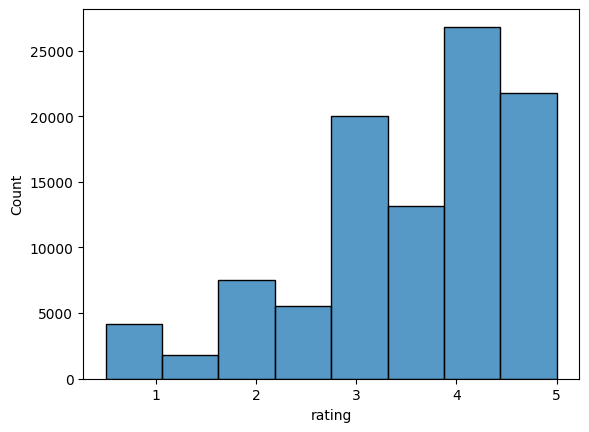

In [8]:
import seaborn as sns, matplotlib.pyplot as plt

sns.histplot(data=df_ratings, x='rating', bins=8)

In [9]:
n_ratings = len(df_ratings)
n_movies = len(df_ratings['movieId'].unique())
n_users = len(df_ratings['userId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average ratings per user: 165.3
Average ratings per movie: 10.37


In [10]:
df_ratings['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [11]:
print('Min:\t\t', df_ratings['movieId'].value_counts().min())
print('Quartile 1:\t', df_ratings['movieId'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['movieId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['movieId'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['movieId'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 3.0
Quartile 3:	 9.0
Max:		 329


In [13]:
# Make a list of movieIds that are not in the 3rd quartile

# Store the count of ratings for each movie
value_counts = df_ratings['movieId'].value_counts()
# Make a list of those with more than 9 ratings
keep_list = value_counts[value_counts >= 9]
df_triple = df_ratings.loc[df_ratings['movieId'].isin(keep_list.index)]

n_ratings = len(df_triple)
n_movies = len(df_triple['movieId'].unique())
n_users = len(df_triple['userId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 82664
Number of unique movieId's: 2441
Number of unique users: 610
Average ratings per user: 135.51
Average ratings per movie: 33.86


In [14]:
import numpy as np
from scipy.sparse import csr_matrix

U = df_triple['userId'].nunique()   # Number of users for the matrix
I = df_triple['movieId'].nunique()  # Number of items for the matrix

# Map user and movie IDs to matrix indices
user_mapper = dict(zip(np.unique(df_triple['userId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_triple['movieId']), list(range(I))))

# Map maxtrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple['userId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple['movieId'])))

# Create a list of index values for the csr_matrix for users and movies
user_index = [user_mapper[i] for i in df_triple['userId']]
item_index = [item_mapper[i] for i in df_triple['movieId']]

# Build the final matrix which will look like: (movieId, userId) rating
X = csr_matrix((df_triple['rating'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of items: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Number of users: 610
Number of items: 2441
user_mapper:	 610   keys:values {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 11

In [15]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [16]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [17]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'userId', 'movieId', 'rating')

In [22]:
movieID = 1

rec_ids, rec_distances = recommend(movieID, X, item_mapper, item_inv_mapper, k=10, messages=False)

print(f"Since you watched {df_movies.loc[movieID, 'title']}, you may also like:\n")

for id in rec_ids:
  print(f"\t{df_movies.loc[id, 'title']}")

Since you watched Jumanji (1995), you may also like:

	Greatest Story Ever Told, The (1965)
	Terminal Velocity (1994)
	Cinderella (1950)
	Quiz Show (1994)
	Age of Innocence, The (1993)
	Beverly Hills Cop III (1994)
	187 (One Eight Seven) (1997)
	Chain Reaction (1996)
	Sliding Doors (1998)
	I Love You, I Love You Not (1996)
